# Setup Environment
Use validation set images from ILSVRC 2012 in google drive folder with labels in meta.json. 

In [0]:
from google.colab import drive
from google.colab import files
from __future__ import print_function, division
import os
import torch
import numpy as np
import scipy
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import json

drive.mount('/content/gdrive')
# set your root path

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#########################################################################################################
#########################################################################################################

# replace stars with own directory until shared RSA project folder
imagenet_validation_path = '/content/gdrive/My Drive/NI Project - RSA/RSA_on_ImageNet/selected_dataset/'
ROOT_PATH = '/content/gdrive/My Drive/NI Project - RSA/RSA_on_ImageNet/'

#########################################################################################################
#########################################################################################################

# Select Data and get Metadata
Take 10 pictures of each of the 1000 classes of validation set.
(since no meta data available for test set)

In [0]:
import torchvision
import io
import seaborn
import pandas as pd
import os
import datetime
import pickle
import time
import torch
import numpy
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as tmodels
from functools import partial
import collections
from skimage import io
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.datasets import ImageFolder
from torchvision.datasets.folder import default_loader 
from torch.utils.data import Dataset, DataLoader
from torchvision.models import *


In [0]:
class ILSVRCSubDataset(Dataset):
    """ILSVRC 2012 subset of the original val dataset"""

    def __init__(self, json_file, root, transform=None):
        """
        Args:
            json_file (string): Path to the json file with meta.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root = root
        self.transform = transform
        # Parse META File
        with open(json_file, "r") as fd:
          self.meta = json.load(fd)
        print(self.meta)

    def __len__(self):
        return len(self.meta)

    def __getitem__(self, idx):
#         print(idx)
#         print(self.meta[idx])
        path = os.path.join(self.root,
                            self.meta[idx][0])
#         print(path)
        sample = default_loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
            
        wnid = self.meta[idx][1]
            
        return sample, wnid

In [0]:
data_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset_val = ILSVRCSubDataset(json_file=os.path.join(imagenet_validation_path,'meta.json'),
                               root=imagenet_validation_path,
                               transform=data_transforms)

dataloaders = torch.utils.data.DataLoader(dataset_val,
                                          batch_size=20,
                                          shuffle=False)


[['ILSVRC2012_val_00000293.JPEG', 'n01440764'], ['ILSVRC2012_val_00002138.JPEG', 'n01440764'], ['ILSVRC2012_val_00003014.JPEG', 'n01440764'], ['ILSVRC2012_val_00006697.JPEG', 'n01440764'], ['ILSVRC2012_val_00007197.JPEG', 'n01440764'], ['ILSVRC2012_val_00009111.JPEG', 'n01440764'], ['ILSVRC2012_val_00009191.JPEG', 'n01440764'], ['ILSVRC2012_val_00009346.JPEG', 'n01440764'], ['ILSVRC2012_val_00009379.JPEG', 'n01440764'], ['ILSVRC2012_val_00009396.JPEG', 'n01440764'], ['ILSVRC2012_val_00000236.JPEG', 'n01443537'], ['ILSVRC2012_val_00000262.JPEG', 'n01443537'], ['ILSVRC2012_val_00000307.JPEG', 'n01443537'], ['ILSVRC2012_val_00000994.JPEG', 'n01443537'], ['ILSVRC2012_val_00002241.JPEG', 'n01443537'], ['ILSVRC2012_val_00002848.JPEG', 'n01443537'], ['ILSVRC2012_val_00003150.JPEG', 'n01443537'], ['ILSVRC2012_val_00003735.JPEG', 'n01443537'], ['ILSVRC2012_val_00004655.JPEG', 'n01443537'], ['ILSVRC2012_val_00004677.JPEG', 'n01443537'], ['ILSVRC2012_val_00002338.JPEG', 'n01484850'], ['ILSVRC2012

# Get model and activations
Use 10 pictures for every one of the 1000 classes on one of torchvisions pretrained model.

In [0]:
def getFileName(n_samples, name):
  return name \
         + "_{}_".format(n_samples) \
         + "_{}_".format(model.name) \
         + datetime.datetime.now().replace(microsecond=0).isoformat() \
         + ".npy"

In [0]:
'''
This is a complete list of models for clarity. 

In practice the notebook was run multiple times with subsets of the models.
(because Google tended to kill the instance from time to time)
'''
model_names = np.array(['resnet34', 'resnet50', 'resnext50_32x4d', 'resnext101_32x8d', 
                        'vgg13', 'vgg16', 'resnet101', 'googlenet', 'alexnet',
                        'squeezenet1_0', 'squeezenet1_1', 'mobilenet', 'vgg13_bn', 
                        'vgg11_bn', 'resnet18', 'vgg16_bn', 'vgg19_bn', 
                        'resnext101_32x8d'])

models = np.array([resnet34(pretrained=True), resnet50(pretrained=True), 
                   resnext50_32x4d(pretrained=True), resnext101_32x8d(pretrained=True), 
                   vgg13(pretrained=True), vgg16(pretrained=True), resnet101(pretrained=True), 
                   googlenet(pretrained=True), alexnet(pretrained=True), 
                   squeezenet1_0(pretrained=True), squeezenet1_1(pretrained=True),
                  mobilenet_v2(pretrained=True), vgg13_bn(pretrained=True), 
                   vgg11_bn(pretrained=True), resnet18(pretrained=True), 
                   vgg16_bn(pretrained=True), vgg19_bn(pretrained=True), 
                   resnext101_32x8d(pretrained=True)])

In [0]:
# TOP-1 AND TOP-5 CONFUSION MATRICES

for model, model_name in zip(models, model_names):
  print(model_name)
  #important: put model in evaluation mode for consistent results
  model.eval()
  
  NR_OF_SAMPLES = 10000
  NR_OF_CLASSES = 1000
  BATCH_SIZE = 20
  confusion_matrix = np.zeros((NR_OF_CLASSES, NR_OF_CLASSES), dtype=int)
  confusion_matrix_top5 = np.zeros((NR_OF_CLASSES, NR_OF_CLASSES), dtype=int)
  SAVE_PATH = ROOT_PATH + 'activations/'
  top_picks_num = 5

  data_iterator = iter(dataloaders)

  for i in range(int(NR_OF_SAMPLES / BATCH_SIZE)):
    if i % 10 == 0:
      print(str(i), sep=' ')
    cur = next(data_iterator)[0]
    out = model(cur)
    out_np = out.data.numpy()
    
    for j in range(BATCH_SIZE):
      true_label = (i * BATCH_SIZE + j) // 10
      #this function is somewhat magical. 
      #For help see https://stackoverflow.com/questions/52465066/how-does-numpys-argpartition-work-on-the-documentations-example
      ind = np.argpartition(out_np[j], [-top_picks_num, -1])[-top_picks_num:]
      
      #Top-1:
      top_predicted_label = ind[-1]
      confusion_matrix[true_label, top_predicted_label] += 1
      confusion_matrix[top_predicted_label, true_label] += 1

      #Top-5:
      for k in ind:
        confusion_matrix_top5[true_label, k] += 1
        confusion_matrix_top5[k, true_label] += 1

  numpy.save(ROOT_PATH + f'confusion_{model_name}.npy', confusion_matrix)
  numpy.save(ROOT_PATH + f'confusion_{model_name}_top5.npy', confusion_matrix_top5)
  print(model_name)

vgg13
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
vgg13
vgg16
0
10
20
30
40


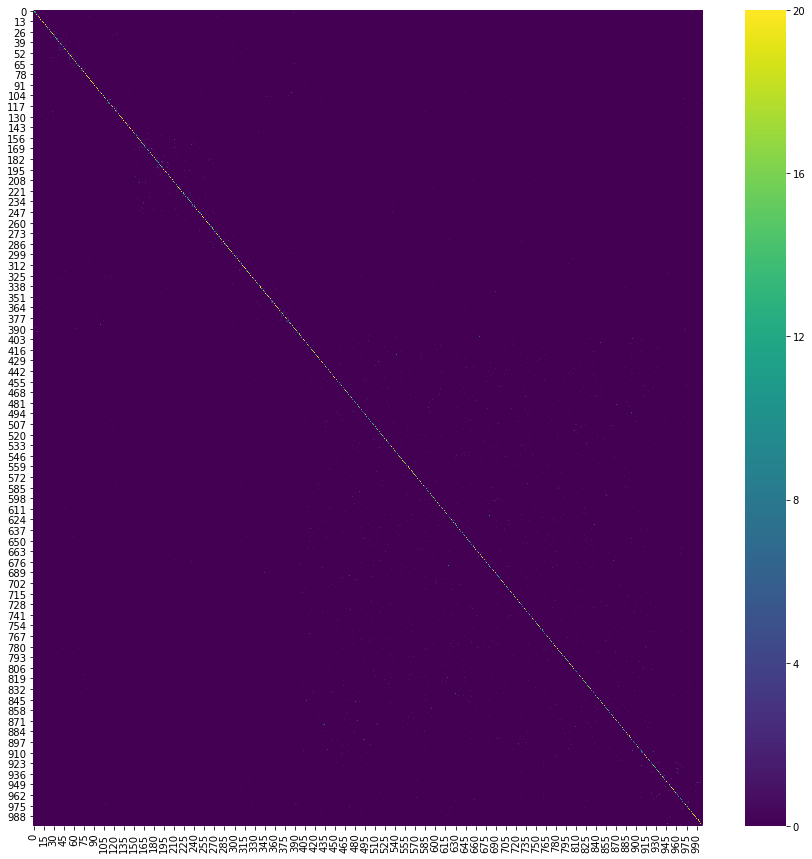

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
cm1 = np.load(ROOT_PATH + f'confusion_{model_name}.npy')
seaborn.heatmap(cm1, ax=ax, cmap='viridis')
print(path)